In [1]:
"""Import a training set and train the network
Then import a test set and try the network on it
"""
import math
import os
from sklearn import linear_model

os.chdir("/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic")

import numpy as np
from matplotlib import pyplot as plt
import h5py
import DYNAPSETools.dynapseSpikesFitter as fitter

folderName = "/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic/caer/myoutputs/thesis_output_aedat/classification/"


plt.close('all')


fileList = ['classification_baseline_test', 'classification_tuned_test' ]


# acc_dict = {}



In [2]:
prediction_train_dict = {}
acc_dict_train = {}
target_dict_train = {}
timeScale_dict_train = {}
prediction_dict_train = {}


prediction_test_dict = {}
acc_dict_test = {}
target_dict_test = {}
timeScale_dict_test = {}
prediction_dict_test = {}

data_dict = {}
      

alphas ={}
alphas[fileList[0]] = 1000
alphas[fileList[1]] = 1000



# ======================================== TRAINING
# Import training data from dataset

for this_File in fileList:
    trainDataset = this_File + '.hdf5'
    testDataset = trainDataset

    fileName = os.path.join(folderName, trainDataset)
    h5f = h5py.File(fileName, "r")
    data = h5f["data"][:]
    target = h5f["target"][:]
    h5f.close()
    

    # Merge together all data (for linear regression)
#     data = np.concatenate(importedData, axis = 1)
#     target = np.concatenate(importedTarget, axis = 1)

    data_dict[this_File] = data

    nonzeroNeuronIndices = np.where(np.sum(data, axis = 1) > 1e-10)[0] 
    data = data[nonzeroNeuronIndices, :]
    
    # carry out linear regression
#     trainIndices = list(range(1,int(len(target[0])/3))) + list(range(int(len(target[0])/2) + 1, int(5 * len(target[0])/6)))
    testIndices = list(range(400, 800))
    trainIndices = list(set(list(range(len(target[0])))) - set(testIndices))
    

    trainData = data[:, trainIndices]
    testData = data[:, testIndices]

    trainTarget = target[:, trainIndices]
    testTarget = target[:, testIndices]

    
    # Make prediction
    alpha  = alphas[this_File]
    regr = linear_model.Ridge(alpha = alpha) # carry out linear regression

    regr.fit(trainData.T, trainTarget.T)
    coefficients = regr.coef_

    prediction_train = fitter.sklearn_prevision(regr = regr, matrix = trainData)
    prediction_test = fitter.sklearn_prevision(regr = regr, matrix = testData)


    prediction_train_dict[this_File] = prediction_train
    prediction_test_dict[this_File] = prediction_test
    
    
#     target = target.T

    timeScale_train = np.arange(np.shape(trainData)[1])
    timeScale_test = np.arange(np.shape(testData)[1])

    
    rights_train, wrongs_train = fitter.prediction_performances(prediction = prediction_train, target = trainTarget.T, firingRateThreshold = 0.5)
    rights_test, wrongs_test = fitter.prediction_performances(prediction = prediction_test, target = testTarget.T, firingRateThreshold = 0.5)

    acc_dict_train[this_File] = round(rights_train / len(prediction_train) * 100,2)
    acc_dict_test[this_File] = round(rights_test / len(prediction_test) * 100,2)

    print(this_File)
    print("Performance: {:f}".format(acc_dict_train[this_File]))
    print("Performance: {:f}".format(acc_dict_test[this_File]))

    target_dict_train[this_File] = trainTarget
    timeScale_dict_train[this_File] = timeScale_train
    prediction_dict_train[this_File] = prediction_train 
    
    target_dict_test[this_File] = testTarget
    timeScale_dict_test[this_File] = timeScale_test
    prediction_dict_test[this_File] = prediction_test
        

          

classification_baseline_test
Performance: 87.250000
Performance: 85.250000
classification_tuned_test
Performance: 98.250000
Performance: 92.500000


# Visualize the neuron activities

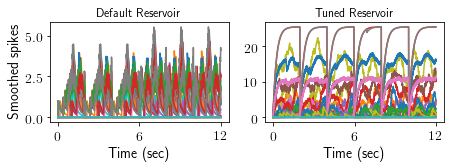

In [6]:
import random
random.seed(1)

plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

width = 6.37
# height = width / 1.618 /2
height = width / 1.5 /2

    

fig = plt.figure()


ax1 = fig.add_subplot(121)

ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Smoothed spikes')
# ax1.set_ylim([-0.1, 35])
# ax1.set_xlim([-0.1, 10.5])
# ax1.set_xticks([0, 3.35, 7.0, 10.5])
# ax1.eventplot(inputSpikes, lineoffsets = 30, linelengths = 6, linewidths = 0.4, color = 'g') 
ax1.set_xticks([0, 6, 12, 18])

ax1.set_title('Default Reservoir')

ax2 = fig.add_subplot(122)
# ax2.set_ylim([-0.1, 140])
# ax2.set_xlim([-0.1, 10.5])

ax2.set_xlabel('Time (sec)')
ax2.set_xticks([0, 6, 12, 18])
# ax2.eventplot(inputSpikes, lineoffsets = 120, linelengths = (140/35)*6, linewidths = 0.4, color = 'g')     
ax2.set_title('Tuned Reservoir')


thisSicMat = data_dict[fileList[0]]
bins = np.arange(thisSicMat.shape[1])

# plotRange = int(3.35 * 100) * nrPeriods

randNeuronIndices = random.sample(range(0, 255), 50)

for i in randNeuronIndices:
    ax1.plot((bins * 0.01), data_dict[fileList[0]][i,:])
    ax2.plot((bins * 0.01), data_dict[fileList[1]][i,:])

# plt.subplots_adjust(wspace=0.2)
fig.subplots_adjust(left=.09, bottom=.25, right=.95, top=0.9)
fig.set_size_inches(width, height)


plt.gcf().savefig('/Users/liutianlin/Desktop/Academics/MSc_thesis/my_msc_thesis/figs/thesis_classification_visualization.pdf', dpi=1200)
plt.show()



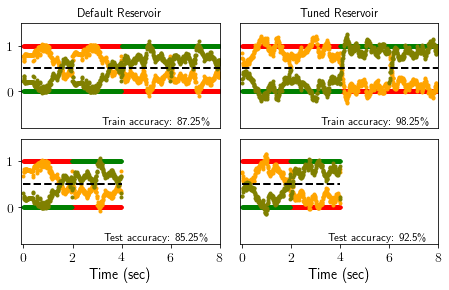

In [5]:

plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

# plt.rcParams.update({'font.size': 22})
width = 6.37
height = width / 1.618

fig = plt.figure()
# fig.subplots_adjust(left=.06, bottom=.16, right=.99, top=.97)
ax1 = fig.add_subplot(221)
handles = []
handle = ax1.plot(timeScale_dict_train[fileList[0]] * 0.01 , target_dict_train[fileList[0]][0,:],  linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handle = ax1.plot(timeScale_dict_train[fileList[0]] * 0.01 , target_dict_train[fileList[0]][1,:],  linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handle = ax1.plot(timeScale_dict_train[fileList[0]] * 0.01 , prediction_dict_train[fileList[0]], linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handles[0].set_color("red")
handles[1].set_color("green")
handles[2].set_color("orange")
handles[3].set_color("olive")
ax1.plot([timeScale_dict_train[fileList[0]][0] * 0.01, timeScale_dict_train[fileList[0]][-1]], [0.5, 0.5], "k--", lw=2)
ax1.set_ylim([-0.8,1.5])
ax1.set_xlim([-0.1,8])
ax1.set_xticks([0, 2, 4, 8])
ax1.set_xticks([])
# ax1.text(10.5, -0.72, 'accuracy: ' + str(acc_dict_train[fileList[0]]) + '\%', fontsize=11)
# ax1.set_xlabel('Time (sec)')
ax1.text(3.2, -0.72, 'Train accuracy: ' + str(acc_dict_train[fileList[0]]) + '\%', fontsize=11)

# ax1.set_ylabel('Prediction')
ax1.set_title('Default Reservoir')


ax2 = fig.add_subplot(222)
handles = []
handle = ax2.plot(timeScale_dict_train[fileList[1]] * 0.01 , target_dict_train[fileList[1]][0,:],  linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handle = ax2.plot(timeScale_dict_train[fileList[1]] * 0.01 , target_dict_train[fileList[1]][1,:],  linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handle = ax2.plot(timeScale_dict_train[fileList[1]] * 0.01 , prediction_dict_train[fileList[1]], linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handles[0].set_color("red")
handles[1].set_color("green")
handles[2].set_color("orange")
handles[3].set_color("olive")
ax2.plot([timeScale_dict_train[fileList[1]][0] * 0.01, timeScale_dict_train[fileList[1]][-1]], [0.5, 0.5], "k--", lw=2)
ax2.text(3.2, -0.72, 'Train accuracy: ' + str(acc_dict_train[fileList[1]]) + '\%', fontsize=11)

ax2.set_ylim([-0.8,1.5])
ax2.set_xlim([-0.1,8])
ax2.set_xticks([0, 2, 4, 8])

ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_title('Tuned Reservoir')

# ax2.set_xlabel('Time (sec)')
# ax2.set_ylabel('Prediction')




ax3 = fig.add_subplot(223)
handles = []
handle = ax3.plot(timeScale_dict_test[fileList[0]] * 0.01 , target_dict_test[fileList[0]][0,:],  linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handle = ax3.plot(timeScale_dict_test[fileList[0]] * 0.01 , target_dict_test[fileList[0]][1,:],  linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handle = ax3.plot(timeScale_dict_test[fileList[0]] * 0.01 , prediction_dict_test[fileList[0]], linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handles[0].set_color("red")
handles[1].set_color("green")
handles[2].set_color("orange")
handles[3].set_color("olive")

ax3.text(3.3, -0.72, 'Test accuracy: ' + str(acc_dict_test[fileList[0]]) + '\%', fontsize=11)

ax3.plot([timeScale_dict_test[fileList[0]][0] * 0.01, 4], [0.5, 0.5], "k--", lw=2)
ax3.set_ylim([-0.8,1.5])
ax3.set_xlim([-0.1,8])
ax3.set_xticks([0, 2, 4, 6, 8])
ax3.set_xlabel('Time (sec)')
# ax3.set_ylabel('Prediction')


ax4 = fig.add_subplot(224)
handles = []
handle = ax4.plot(timeScale_dict_test[fileList[1]] * 0.01 , target_dict_test[fileList[1]][0,:],  linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handle = ax4.plot(timeScale_dict_test[fileList[1]] * 0.01 , target_dict_test[fileList[1]][1,:],  linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handle = ax4.plot(timeScale_dict_test[fileList[1]] * 0.01 , prediction_dict_test[fileList[1]], linestyle = 'None', marker = 'o',markersize = 3)
handles.extend(handle)
handles[0].set_color("red")
handles[1].set_color("green")
handles[2].set_color("orange")
handles[3].set_color("olive")
ax4.plot([timeScale_dict_test[fileList[1]][0] * 0.01, 4], [0.5, 0.5], "k--", lw=2)
ax4.text(3.5, -0.72, 'Test accuracy: ' + str(acc_dict_test[fileList[1]]) + '\%', fontsize=11)

ax4.set_ylim([-0.8,1.5])
ax4.set_xlim([-0.1,8])
ax4.set_xticks([0, 2, 4, 6, 8])
ax4.set_yticks([])
ax4.set_xlabel('Time (sec)')
# ax4.set_ylabel('Prediction')


fig.set_size_inches(width, height)
fig.subplots_adjust(left=.06, bottom=.15, right=.97, top=.93, hspace = 0.1, wspace=0.1)

# plt.subplots_adjust(bottom = 0.3, wspace=0.2)
plt.gcf().savefig('/Users/liutianlin/Desktop/Academics/MSc_thesis/my_msc_thesis/figs/thesis_classification_combined.pdf', dpi=1200)


